In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
url = "https://www.worldometers.info/coronavirus/"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")

In [3]:
results = soup.find(id='main_table_countries_today')
result = results.find_all('tr')

In [4]:
#result

In [5]:
print(result[0].get_text().split('\n')[1:11])

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical']


In [6]:
Country=[]
TotalCases=[]
NewCases=[]
TotalDeaths=[]
NewDeaths=[]
TotalRecovered=[]
ActiveCases=[]
Serious_Critical=[]
TotCases1Mpop=[]
TotDeaths1Mpop=[]

covid19_table = {
    "Country": Country,
    "Total Cases": TotalCases,
    "New Cases": NewCases,
    "Total Deaths": TotalDeaths,
    "New Deaths": NewDeaths,
    "Total Recovered": TotalRecovered,
    "Active Cases": ActiveCases,
    "critical": Serious_Critical,
    "total_cases_per_1M_ pop": TotCases1Mpop,
     "Total_death_per_1M_pop":TotDeaths1Mpop,
}

for i in range(1,len(result)):
    if(i<9):
        pass
    else:
        l=result[i].get_text().split('\n')[1:13]
        Country.append(l[1])
        TotalCases.append(l[2].replace(',',''))
        NewCases.append(l[3].replace(',',''))
        TotalDeaths.append(l[4].replace(',',''))
        NewDeaths.append(l[5].replace(',',''))
        TotalRecovered.append(l[6].replace(',',''))
        ActiveCases.append(l[8].replace(',',''))
        Serious_Critical.append(l[9].replace(',',''))
        TotCases1Mpop.append(l[10].replace(',',''))
        TotDeaths1Mpop.append(l[11].replace(',',''))

df = pd.DataFrame.from_dict(covid19_table, orient='index').transpose()
df


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,critical,total_cases_per_1M_ pop,Total_death_per_1M_pop
0,USA,25566789,,427635,,15330949,9808205,26998,76986,1288
1,India,10655435,,153376,,10316786,185273,8944,7679,111
2,Brazil,8816254,,216475,,7628438,971341,8318,41311,1014
3,Russia,3698273,,68971,,3109315,519987,2300,25336,473
4,UK,3617459,,97329,,1616307,1903823,4076,53130,1429
...,...,...,...,...,...,...,...,...,...,...
224,Total:,28883849,+2583,662336,+51,15988497,12233016,29993,,
225,Total:,3434479,,84641,,2879164,470674,2750,,
226,Total:,49864,+12,1073,,33913,14878,12,,
227,Total:,721,,15,,706,0,0,,


In [7]:
df_pie = df.filter(['Country','Total Deaths','Total Cases','Total Recovered'], axis=1)
df_pie.tail(11)

,Country,Total Deaths,Total Cases,Total Recovered
218,Micronesia,,1,
219,Vanuatu,,1,1
220,China,4635,88991,82556
221,Total:,618111,29226030,18176153
222,Total:,363557,22507910,20931129
223,Total:,400689,15226435,13374033
224,Total:,662336,28883849,15988497
225,Total:,84641,3434479,2879164
226,Total:,1073,49864,33913
227,Total:,15,721,706


In [8]:
df_pie.drop(df.tail(9).index,inplace=True) 
pd.set_option('display.max_rows', None)
df_pie

,Country,Total Deaths,Total Cases,Total Recovered
0,USA,427635,25566789,15330949
1,India,153376,10655435,10316786
2,Brazil,216475,8816254,7628438
3,Russia,68971,3698273,3109315
4,UK,97329,3617459,1616307
5,France,72877,3035181,216725
6,Spain,55441,2603472,N/A
7,Italy,85162,2455185,1871189
8,Turkey,24933,2424328,2301861
9,Germany,52536,2137689,1807500


In [9]:

df_pie.dtypes

Country            object
Total Deaths       object
Total Cases        object
Total Recovered    object
dtype: object

In [10]:
for column in df_pie: 
    if column=='Country':
        pass
    else:
        df_pie[column] = pd.to_numeric(df_pie[column], errors='coerce')

In [11]:
df_pie.dtypes

Country             object
Total Deaths       float64
Total Cases          int64
Total Recovered    float64
dtype: object

In [12]:
df_pie=df_pie.sort_values('Total Deaths', ascending = False)
df_top_ten_death_count_country = df_pie[:10].copy()
df_top_ten_death_count_country

,Country,Total Deaths,Total Cases,Total Recovered
0,USA,427635.0,25566789,15330949.0
2,Brazil,216475.0,8816254,7628438.0
1,India,153376.0,10655435,10316786.0
12,Mexico,149084.0,1752347,1306138.0
4,UK,97329.0,3617459,1616307.0
7,Italy,85162.0,2455185,1871189.0
5,France,72877.0,3035181,216725.0
3,Russia,68971.0,3698273,3109315.0
15,Iran,57294.0,1367032,1158475.0
6,Spain,55441.0,2603472,NaN


In [13]:
new_row = pd.DataFrame(data = {
    'Country' : ['Others'],
    'Total Deaths' : [df_pie['Total Deaths'][10:].sum()],
    'Total Cases' : [df_pie['Total Cases'][10:].sum()],
    'Total Recovered' : [df_pie['Total Recovered'][10:].sum()],
})
df_top_ten_death_count_country = pd.concat([df_top_ten_death_count_country, new_row])
df_top_ten_death_count_country

,Country,Total Deaths,Total Cases,Total Recovered
0,USA,427635.0,25566789,15330949.0
2,Brazil,216475.0,8816254,7628438.0
1,India,153376.0,10655435,10316786.0
12,Mexico,149084.0,1752347,1306138.0
4,UK,97329.0,3617459,1616307.0
7,Italy,85162.0,2455185,1871189.0
5,France,72877.0,3035181,216725.0
3,Russia,68971.0,3698273,3109315.0
15,Iran,57294.0,1367032,1158475.0
6,Spain,55441.0,2603472,NaN


In [14]:
df_top_ten_death_count_country=df_top_ten_death_count_country.set_index('Country')
df_top_ten_death_count_country['Total Recovered'] = df_top_ten_death_count_country['Total Recovered'].fillna(0)
df_top_ten_death_count_country

,Total Deaths,Total Cases,Total Recovered
Country,,,
USA,427635.0,25566789,15330949.0
Brazil,216475.0,8816254,7628438.0
India,153376.0,10655435,10316786.0
Mexico,149084.0,1752347,1306138.0
UK,97329.0,3617459,1616307.0
Italy,85162.0,2455185,1871189.0
France,72877.0,3035181,216725.0
Russia,68971.0,3698273,3109315.0
Iran,57294.0,1367032,1158475.0


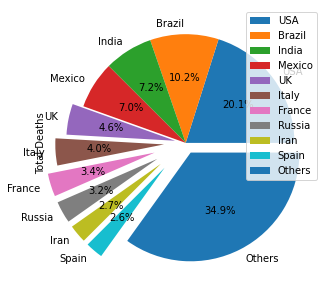

In [15]:
plot = df_top_ten_death_count_country.plot.pie(y='Total Deaths', figsize=(5, 5) ,autopct='%1.1f%%',
                                            explode=(0,0,0,0,.1,.2,.3,.3,.3,.3,.1),startangle=0)

#out of the total deaths 20.19% is from USA

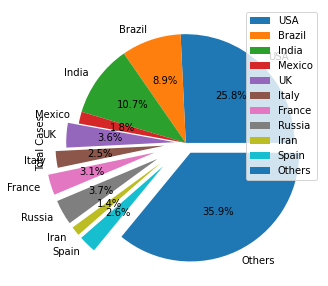

In [16]:
plot = df_top_ten_death_count_country.plot.pie(y='Total Cases', figsize=(5, 5) ,autopct='%1.1f%%',
                                            explode=(0,0,0,0,.1,.2,.3,.3,.3,.3,.1),startangle=0)
#out of total confirmed cases 25.8% is from USA

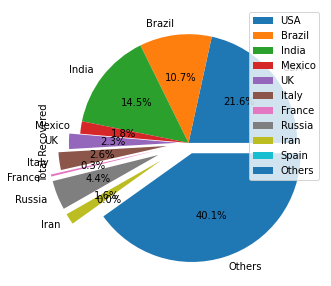

In [18]:
plot = df_top_ten_death_count_country.plot.pie(y='Total Recovered', figsize=(5, 5) ,autopct='%1.1f%%',
                                            explode=(0,0,0,0,.1,.2,.3,.3,.3,.3,.1),startangle=0)

# Ratio= Total Death / Total Cases for countries

In [21]:
df_pie

,Country,Total Deaths,Total Cases,Total Recovered
0,USA,427635.0,25566789,15330949.0
2,Brazil,216475.0,8816254,7628438.0
1,India,153376.0,10655435,10316786.0
12,Mexico,149084.0,1752347,1306138.0
4,UK,97329.0,3617459,1616307.0
7,Italy,85162.0,2455185,1871189.0
5,France,72877.0,3035181,216725.0
3,Russia,68971.0,3698273,3109315.0
15,Iran,57294.0,1367032,1158475.0
6,Spain,55441.0,2603472,NaN


In [53]:
df_death_ratio = df_pie.filter(['Country','Total Deaths','Total Cases'], axis=1)
df_death_ratio['Total Deaths'] = df_death_ratio['Total Deaths'].fillna(0)
df_death_ratio=df_death_ratio.dropna()
df_death_ratio['Total Deaths'].isnull().sum()

0

In [58]:
# df_death_ratio
df_death_ratio['Death by case ratio'] = (df_death_ratio['Total Deaths'] / df_death_ratio['Total Cases'])
df_death_ratio

,Country,Total Deaths,Total Cases,Death by case ratio
167,Yemen,615.0,2118,0.290368
214,MS Zaandam,2.0,9,0.222222
213,Western Sahara,1.0,10,0.100000
12,Mexico,149084.0,1752347,0.085077
212,Montserrat,1.0,13,0.076923
123,Syria,879.0,13557,0.064837
45,Ecuador,14596.0,238232,0.061268
107,Sudan,1603.0,26279,0.060999
191,Isle of Man,25.0,432,0.057870
61,Egypt,8902.0,161143,0.055243


In [83]:
df_death_ratio=df_death_ratio.sort_values('Death by case ratio', ascending = False)
df_death_ratio_bar_graph= df_death_ratio[:10].copy()
df_death_ratio_bar_graph=df_death_ratio_bar_graph.set_index('Country')

<Figure size 432x288 with 0 Axes>

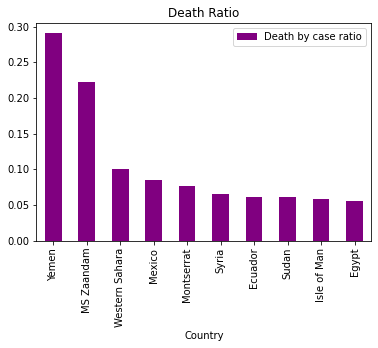

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = df_death_ratio_bar_graph.plot.bar(y='Death by case ratio',rot=0,color="purple")
plt.xticks(rotation='vertical')
plt.title('Death Ratio')
plt.show()
#Yemen has the highest death ratio: more no of people are dying for each confirmed cases

# Recovery rate

In [86]:
df_recovery_rate = df_pie.filter(['Country','Total Recovered','Total Cases'], axis=1)
df_recovery_rate['Total Recovered'] = df_recovery_rate['Total Recovered'].fillna(0)
# df_recovery_rate=df_recovery_rate.dropna()
df_recovery_rate['Total Recovered'].isnull().sum()

0

In [87]:
df_recovery_rate['Recovery rate'] = (df_recovery_rate['Total Recovered'] / df_death_ratio['Total Cases'])
df_recovery_rate

,Country,Total Recovered,Total Cases,Recovery rate
0,USA,15330949.0,25566789,0.599643
2,Brazil,7628438.0,8816254,0.865270
1,India,10316786.0,10655435,0.968218
12,Mexico,1306138.0,1752347,0.745365
4,UK,1616307.0,3617459,0.446807
7,Italy,1871189.0,2455185,0.762138
5,France,216725.0,3035181,0.071404
3,Russia,3109315.0,3698273,0.840748
15,Iran,1158475.0,1367032,0.847438
6,Spain,0.0,2603472,0.000000


In [88]:
df_recovery_rate=df_recovery_rate.sort_values('Recovery rate', ascending = False)
df_recovery_rate_bar_graph= df_recovery_rate[:10].copy()
df_recovery_rate_bar_graph=df_recovery_rate_bar_graph.set_index('Country')
df_recovery_rate_bar_graph

,Total Recovered,Total Cases,Recovery rate
Country,,,
Vanuatu,1.0,1,1.000000
Samoa,2.0,2,1.000000
Wallis and Futuna,4.0,4,1.000000
Marshall Islands,4.0,4,1.000000
Anguilla,15.0,15,1.000000
Saint Pierre Miquelon,16.0,16,1.000000
Greenland,30.0,30,1.000000
Laos,41.0,41,1.000000
Singapore,59015.0,59260,0.995866


<Figure size 432x288 with 0 Axes>

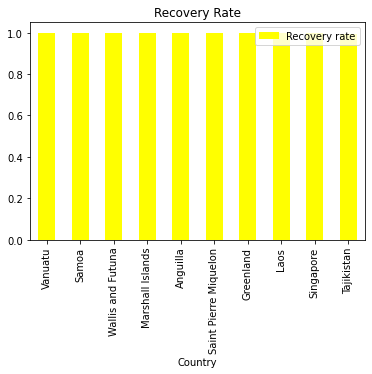

In [89]:
fig = plt.figure()
ax = df_recovery_rate_bar_graph.plot.bar(y='Recovery rate',rot=0,color="yellow")
plt.xticks(rotation='vertical')
plt.title('Recovery Rate')
plt.show()
#Eight countires have 100% recovery rate

# Death Rate and Recovery Rate of top 5 most effected countires 

In [91]:
df_death_and_recovery_rate=df_pie.filter(['Country','Total Recovered','Total Cases','Total Deaths'], axis=1)[:10]
# df_death_and_recovery_rate = df_pie[:10].copy()

In [93]:
df_death_and_recovery_rate=df_death_and_recovery_rate.dropna()

In [94]:
df_death_and_recovery_rate

,Country,Total Recovered,Total Cases,Total Deaths
0,USA,15330949.0,25566789,427635.0
2,Brazil,7628438.0,8816254,216475.0
1,India,10316786.0,10655435,153376.0
12,Mexico,1306138.0,1752347,149084.0
4,UK,1616307.0,3617459,97329.0
7,Italy,1871189.0,2455185,85162.0
5,France,216725.0,3035181,72877.0
3,Russia,3109315.0,3698273,68971.0
15,Iran,1158475.0,1367032,57294.0


In [103]:
df_death_and_recovery_rate['Recovery rate'] = (df_death_and_recovery_rate['Total Recovered'] / df_death_and_recovery_rate['Total Cases'])
df_death_and_recovery_rate['Death rate'] = (df_death_and_recovery_rate['Total Deaths'] / df_death_and_recovery_rate['Total Cases'])
df_death_and_recovery_rate=df_death_and_recovery_rate.set_index('Country')

<ipython-input-103-20e97f191e18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death_and_recovery_rate['Recovery rate'] = (df_death_and_recovery_rate['Total Recovered'] / df_death_and_recovery_rate['Total Cases'])
<ipython-input-103-20e97f191e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death_and_recovery_rate['Death rate'] = (df_death_and_recovery_rate['Total Deaths'] / df_death_and_recovery_rate['Total Cases'])


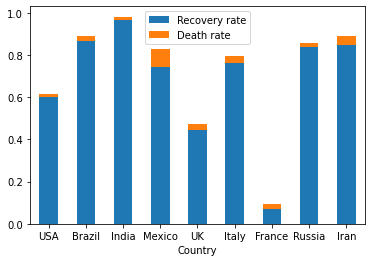

In [104]:
ax = df_death_and_recovery_rate.plot.bar(y=['Recovery rate','Death rate'], rot=0,stacked=True)
#india has the highest recovery rate
#all countries have recovery rate much higher than death rate